In [2]:
#Loading Required Packages 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [10]:
#Importing the Dataset 
df = pd.read_csv('/Users/sameekshabs/Downloads/car.csv')

In [11]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,0
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [12]:
# Display the first few rows to understand the data structure
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [15]:
#from the above results we can see the hoursepower datatype was object so lets change the data type to integer
df['Horsepower'] = pd.to_numeric(df['Horsepower'], downcast='integer', errors='coerce')


In [16]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64


In [17]:
# Handling missing values (assuming you want to fill missing values with the mean)
df.fillna(df.mean(), inplace=True)

In [18]:
# Check for duplicate rows and remove them
df.drop_duplicates(inplace=True)


In [19]:
# Check data types
print("\nData Types:\n", df.dtypes)



Data Types:
 MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model Year        int64
US Made           int64
dtype: object


In [20]:
# Check for outliers and decide how to handle them
# For simplicity, let's remove rows with outliers in the 'Horsepower' column
q1 = df['Horsepower'].quantile(0.25)
q3 = df['Horsepower'].quantile(0.75)
iqr = q3 - q1
outliers = (df['Horsepower'] < q1 - 1.5 * iqr) | (df['Horsepower'] > q3 + 1.5 * iqr)
df = df[~outliers]


In [21]:
# Check categorical values
# Assuming 'US Made' column has binary values (0 and 1), and we want to ensure consistency
df['US Made'] = df['US Made'].astype(int)


/var/folders/q4/f4mdy_c93cg3vc9r_2_2rxn80000gn/T/ipykernel_1388/688912458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['US Made'] = df['US Made'].astype(int)


In [24]:
#Now replace the "?" with Nan in the varaible HorsePower 
df.replace('?', np.nan, inplace=True)

#data cleaning for the variable horsepower using mean imputation 
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].mean())


/var/folders/q4/f4mdy_c93cg3vc9r_2_2rxn80000gn/T/ipykernel_1388/2456248558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('?', np.nan, inplace=True)
/var/folders/q4/f4mdy_c93cg3vc9r_2_2rxn80000gn/T/ipykernel_1388/2456248558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].mean())


In [39]:
# Print cleaned dataset
print("\nCleaned Dataset:\n", df.head())


Cleaned Dataset:
     MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   Model Year  US Made  
0          70        1  
1          70        1  
2          70        1  
3          70        1  
4          70        1  


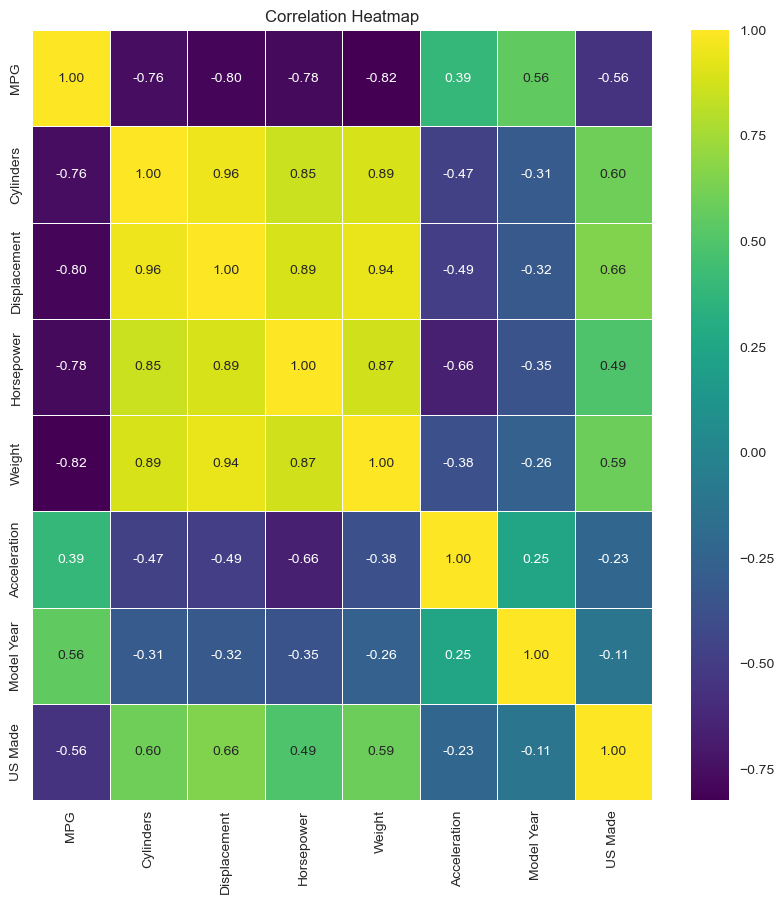

In [81]:
# Assuming the cleaned dataset is stored in the variable 'df'

# Set the size of the heatmap
plt.figure(figsize=(10, 10))

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [46]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np


# Selecting the relevant variables for the model
X = df[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'US Made']]
y = df['MPG']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant term to the independent variables matrix
X_train = sm.add_constant(X_train)

# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

# Display the model summary
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Evaluate the model performance using R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

# Evaluate the model performance using AIC
aic = model.aic
print(f'AIC: {aic}')


                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     196.5
Date:                Sun, 21 Jan 2024   Prob (F-statistic):          2.93e-108
Time:                        02:19:45   Log-Likelihood:                -799.76
No. Observations:                 309   AIC:                             1616.
Df Residuals:                     301   BIC:                             1645.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.8830      5.118     -2.908   

In [76]:
#stepwise regression methods

def forward_regression(X, y, initial_list=None, threshold_in=0.01, threshold_out=0.05, verbose=True):
    if initial_list is None:
        initial_list = []
    
    included = list(initial_list)
    
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        
        best_pval = new_pval.min()
        
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            
            if verbose:
                print(f'Add {best_feature} with p-value {best_pval:.4f}')
        
        if not changed:
            break
    
    return included

selected_features_forward = forward_regression(X_train, y_train)
print("Selected Features:", selected_features_forward)


forward_regression(X_train, y_train)

Add const with p-value 0.0000
Add Weight with p-value 0.0000
Add Model Year with p-value 0.0000
Add US Made with p-value 0.0001
Selected Features: ['const', 'Weight', 'Model Year', 'US Made']
Add const with p-value 0.0000
Add Weight with p-value 0.0000
Add Model Year with p-value 0.0000
Add US Made with p-value 0.0001


['const', 'Weight', 'Model Year', 'US Made']

In [77]:
##Backward Selection Regression

def backward_regression(X, y, initial_list=None, threshold_in=0.01, threshold_out=0.05, verbose=True):
    if initial_list is None:
        initial_list = list(X.columns)
    
    included = list(initial_list)
    
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
            break
    
    return included

selected_features_backward = backward_regression(X_train, y_train)
print("Selected Features:", selected_features_backward)

backward_regression(X_train, y_train)

Drop Acceleration with p-value 0.6996
Drop Cylinders with p-value 0.5259
Drop Horsepower with p-value 0.0649
Selected Features: ['const', 'Displacement', 'Weight', 'Model Year', 'US Made']
Drop Acceleration with p-value 0.6996
Drop Cylinders with p-value 0.5259
Drop Horsepower with p-value 0.0649


['const', 'Displacement', 'Weight', 'Model Year', 'US Made']

In [78]:
# Assuming X_train and y_train are already defined

def stepwise_selection(X, y, initial_list=None, threshold_in=0.01, threshold_out=0.05, verbose=True):
    if initial_list is None:
        initial_list = list(X.columns)
    
    included = list(initial_list)
    
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        
        # Forward step
        new_pval_forward = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval_forward[new_column] = model.pvalues[new_column]
        
        best_pval_forward = new_pval_forward.min()
        
        if best_pval_forward < threshold_in:
            best_feature_forward = new_pval_forward.idxmin()
            included.append(best_feature_forward)
            changed = True
            if verbose:
                print(f'Add {best_feature_forward} with p-value {best_pval_forward:.4f} (Forward)')
        
        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        pvalues_backward = model.pvalues.iloc[1:]
        worst_pval_backward = pvalues_backward.max()
        
        if worst_pval_backward > threshold_out:
            worst_feature_backward = pvalues_backward.idxmax()
            included.remove(worst_feature_backward)
            changed = True
            if verbose:
                print(f'Drop {worst_feature_backward} with p-value {worst_pval_backward:.4f} (Backward)')
        
        if not changed:
            break
    
    return included

selected_features_stepwise = stepwise_selection(X_train, y_train)
print("Selected Features:")
for feature in selected_features_stepwise:
    print(feature)


Drop Acceleration with p-value 0.6996 (Backward)
Drop Cylinders with p-value 0.5259 (Backward)
Drop Horsepower with p-value 0.0649 (Backward)
Selected Features:
const
Displacement
Weight
Model Year
US Made


In [79]:
#Feature Selection Method 
#UniVarient Varibale

# Specify the number of top features to select (k value)
k_value = 2

# Create a SelectKBest model with f_regression as the scoring function
model = SelectKBest(score_func=f_regression, k=k_value)

# Fit the model on the training set
results = model.fit(X_train, y_train)

# Get feature names and corresponding scores
feature_names = pd.DataFrame(X_train.columns, columns=['Feature'])
scores = pd.DataFrame(results.scores_, columns=['Score'])

# Combine feature names and scores
scored = pd.concat([feature_names, scores], axis=1)

# Sort by scores in ascending order
scored_sorted = scored.sort_values(by='Score')

scored.columns = [ "Feature", "Score"]
scored.sort_values(by=['Score']).head(13)


,Feature,Score
0,const,0.000000
5,Acceleration,38.831152
6,Model Year,133.018251
7,US Made,147.142572
1,Cylinders,403.441270
3,Horsepower,420.910182
2,Displacement,522.044225
4,Weight,643.827142
